## Iris Dataset - Saniya - 6210661

In [40]:
#We will first import the neccessary libraries for this project
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [3]:
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

In [41]:
##We will read the file into a dataframe using the url, and the columns are predefined
data = pd.read_csv(path, names = headernames)

In [5]:
data.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
#Dataset has inconsistent magnitude of the data, to bring them all to the same level by normalizing it using scaler() 
scaler = StandardScaler()

In [46]:
#In preprocessing, we will not scale down or normalize the target class as that could affect the model hence we drop it
scaler.fit(data.drop('Class',axis=1))

StandardScaler()

In [47]:
#We transform this df (excluding the target class) it will transform the data for that its distribution will have 
#a mean of 0 & standard deviation of 1
scaled_features = scaler.transform(data.drop('Class',axis=1))

In [48]:
scaled_features

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [49]:
df_feat = pd.DataFrame(scaled_features,columns=data.columns[:-1])
df_feat.head()

,sepal-length,sepal-width,petal-length,petal-width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


# Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
#We will split the data arrays into subsets: for training data and for testing data with X being the other features of the df and Y being the target class
#We will have X_train and Y_train for the training of the model
#And the X_test and Y_test for the testing of the model
X_train, X_test, y_train,  y_test = train_test_split(scaled_features,data['Class'],
                                                    test_size=0.30)

# Using KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
#the classifier will implement learning based on the k nearest neighbors where the number will be specified for us it is 1
knn = KNeighborsClassifier(n_neighbors=1)

In [61]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [62]:
#we will now predict to see how well the model can classify using the X_test
#the new points from the X_test will be assigned a value based on how closely it resembles the points in the training set
pred = knn.predict(X_test)

In [63]:
pred 

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa'],
      dtype=object)

Predictions and Evaluations

In [56]:
from sklearn.metrics import classification_report,confusion_matrix

In [64]:
print(confusion_matrix(y_test,pred))

[[16  0  0]
 [ 0 10  3]
 [ 0  0 16]]


Looking at the above values we can interpret this confusion matrix by the values as such: from the three flower classes each row and colum belong to each flower class. The first row and column have 16 out of 16 samples truly classified hence there are no misinterpretations. TThe 2nd row and column have 10 flowers interepretted correctly while 3 for the samples are misclassfied as another class. While in the last column and row we can see that 16 out of 16 samples are rightly classified.

In [66]:
print(classification_report(y_test,pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.77      0.87        13
 Iris-virginica       0.84      1.00      0.91        16

       accuracy                           0.93        45
      macro avg       0.95      0.92      0.93        45
   weighted avg       0.94      0.93      0.93        45



The model has an accuracy of 93% and is a good model with an adequate classification interpretation.

Choosing a K value

In [24]:
#we will now check the error rate of the classification model to see what is the ratio when the y_test sample has failed to match the prediction of the model
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

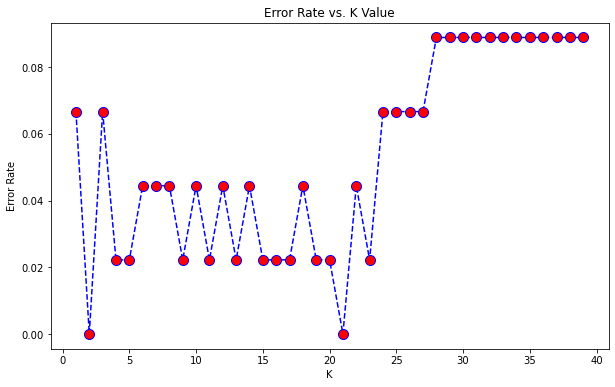

In [26]:
#we will plot a graph to see the results and understand better
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [39]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=2')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=2


[[16  0  0]
 [ 0 13  0]
 [ 0  1 15]]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.94      0.97        16

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



After several tries we can see that with K value as 23 we get the highest accuracy level, with the lowest error rate. While other values of K give a lower accuracy level. hence we will select K to be 23